# Exploración de Datos Abiertos en Paraguay

## Introducción

En este trabajo práctico, nos enfocaremos en el uso y la exploración de datos abiertos en Paraguay, con el objetivo de adquirir experiencia práctica en el manejo de conjuntos de datos públicos. Los datos abiertos son aquellos que están disponibles para el acceso y uso público, y pueden ser utilizados para analizar, visualizar e investigar diversos aspectos de interés en diferentes campos.

## ¿Qué son los datos abiertos y por qué son importantes en el contexto de Paraguay?

Los datos abiertos es la información que está disponible para todo el público y accesible para cualquier persona, sin ninguna restricción de uso. Estos datos suelen estar en formato digital y estructurados, lo que lo hace de fácil acceso y con la posibilidad de reutilizarlos y redistribuirlos por parte de los usuarios. En Paraguay como en otras partes del mundo los datos abiertos son importantes para la transparencia que brindan ya que son accesibles para los ciudadanos y por ende analizables para encontrar información importante del funcionamiento del gobierno, presupuestos, proyectos y otros temas relevantes del gobierno. También es importante porque fomenta la participación de la ciudadanía ya que entenderán mejor la situación y los problemas del gobierno y de su sociedad como para poder actuar ante las adversidades de una mejor manera. Impulsa a la innovación y emprendedores para analizar los datos y así desarrollar sus servicios o aplicaciones con conocimiento del mercado y las oportunidades. Mejora la investigación y educación en la parte académica y científica de diversas disciplinas.

## Beneficios y oportunidades que ofrecen los datos abiertos para la sociedad y el sector de la informática.

Algunos beneficios para la sociedad son algunos ya mencionados previamente como la transparencia, la participación de la ciudadanía, la innovación  y desarrollo de emprendedores. Y en el sector de la informática trae oportunidades como mejores desarrollos de aplicaciones y servicios, fomenta colaboración y cooperación entre los profesionales de informática ya que pueden compartir los datos, códigos y hasta el conocimiento para mejorar la calidad de los productos.  También ofrecen oportunidades de aprendizaje ya que pueden usar los datos para adquirir experiencia por ejemplo analizando datos, y eso mejora los conocimientos y las habilidades de las personas.


## Investigar y proporcionar una lista de fuentes de datos abiertos relevantes en Paraguay

Portal de datos abiertos del gobierno, es donde se encuentran muchos conjuntos de datos como presupuestos, educación, salud, transporte, medio ambiente, etc. El link es https://www.datos.gov.py/. Después está el portal de contrataciones públicas que cuenta con los presupuestos, licitaciones, planificaciones y más. El link es https://www.contrataciones.gov.py/. El ministerio de hacienda también cuenta con datos abiertos, cuenta con presupuesto, deuda, monto ejecutado y más información relevante. El link es https://datos.hacienda.gov.py/. El INE, instituto nacional de encuestas cuenta con las encuestas sobre la ciudadanía, ingreso familiar, cantidad poblacional, índice de pobreza, tasas y más. El link es https://www.ine.gov.py/datos/encuestas/eph/. Estos son los cuatro links con datos más interesantes.

## Los conjuntos de datos para utilizar en el resto del trabajo práctico.

Para este trabajo se obtuvieron las bases de datos de todas la universidades e instituciones educacionales del Paraguay y la base de datos de todos los egresados del Paraguay, con el fin de analizar puntos relevantes e interesantes de nuestro sistema educativo.

## Descarga y preparación de datos

En el siguiente link podemos encontrar una lista de varios datasets, incluyendo las dos seleccionadas para el analisis, https://datos.mec.gov.py/data.

## Limpieza y preparación de datos

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from unidecode import unidecode
import re
import matplotlib.pyplot as plt

In [3]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.4 MB/s eta 0:00:00


In [6]:
from google.colab import files
uploaded = files.upload()

Saving registros_titulos 2.csv to registros_titulos 2.csv


### Data Frame de las carreras disponibles

In [7]:
df = pd.read_csv("carreras.csv", sep=',')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12440 entries, 0 to 12439
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nombre_institucion              12440 non-null  object 
 1   codigo_institucion              12440 non-null  object 
 2   tipo_institucion                12440 non-null  object 
 3   tipo_gestion                    12414 non-null  object 
 4   codigo_departamento             12440 non-null  int64  
 5   departamento                    12440 non-null  object 
 6   codigo_distrito                 12183 non-null  float64
 7   distrito                        12440 non-null  object 
 8   codigo_establecimiento          12436 non-null  object 
 9   establecimiento                 12440 non-null  object 
 10  carrera_institucion_id          12440 non-null  int64  
 11  codigo_oferta                   12440 non-null  object 
 12  codigo_carrera                  

In [9]:
df.head()

,nombre_institucion,codigo_institucion,tipo_institucion,tipo_gestion,codigo_departamento,departamento,codigo_distrito,distrito,codigo_establecimiento,establecimiento,...,denominacion_carrera,denominacion_titulo,nivel_titulacion,enfasis_id,enfasis_carrera,modalidad_asistencia,clasificacion_campo_detallado,clasificacion_campo_especifico,clasificacion_campo_amplio,activa
0,INSTITUTO TÉCNICO SUPERIOR SANTA ROSA MÍSTICA,*325430,Instituto Técnico Superior,Privado,1,Concepción,1.0,Concepción,*234241,INSTITUTO TÉCNICO SUPERIOR SANTA ROSA MÍSTICA ...,...,TECNICATURA EN ADMINISTRACION HOSPITALARIA,DIPLOMADO,Educación de Pre-grado - Educación Técnica Sup...,NaN,NaN,Presencial,NaN,NaN,NaN,SI
1,UNIVERSIDAD CATÓLICA NUESTRA SEÑORA DE LA ASUN...,*316826,Universidad,Privado,4,Guairá,1.0,Villarrica,*210015,UNIVERSIDAD CATÓLICA NUESTRA SEÑORA DE LA ASUN...,...,CONTADOR PUBLICO NACIONAL,CONTADOR(A) PUBLICO NACIONAL,Educación de Grado,NaN,NaN,Presencial,Contabilidad e impuestos,Educación comercial y administración,Administración de empresas y derecho,SI
2,INSTITUTO TÉCNICO SUPERIOR DEL ROSARIO,*326333,Instituto Técnico Superior,Privado,7,Itapúa,17.0,Obligado,*235201,INSTITUTO TÉCNICO SUPERIOR DEL ROSARIO,...,AGRONEGOCIOS,TÉCNICO SUPERIOR EN AGRONEGOCIOS,Educación de Pre-Grado - Educación Técnica Sup...,NaN,NaN,Presencial,Producción agrícola y ganadera,Agricultura,"Agricultura, silvicultura, pesca y veterinaria",SI
3,INSTITUTO TÉCNICO SUPERIOR DE AERONÁUTICA,*319210,Instituto Técnico Superior,Oficial,11,Central,9.0,Luque,*227025,INSTITUTO TÉCNICO SUPERIOR DE AERONÁUTICA,...,INTERPRETE DE INSTRUMENTOS MUSICALES,TECNICO SUPERIOR EN INTERPRETE DE INSTRUMENTOS...,Educación de Pre-Grado - Educación Técnica Sup...,NaN,NaN,Presencial,Música y artes escénicas,Artes,Artes y humanidades,SI
4,INSTITUTO DE FORMACION DOCENTE DE CORONEL OVIEDO,*318638,Instituto de Formación Docente,Oficial,5,Caaguazú,1.0,Coronel Oviedo,*226453,INSTITUTO DE FORMACION DOCENTE DE CORONEL OVIE...,...,Profesorado de Educación Escolar Básica para e...,Profesor de Educación Escolar Básica para el 1...,Educación de Pre-Grado (Formación Docente Inic...,NaN,NaN,Presencial,NaN,NaN,NaN,SI


In [10]:
df = df.drop(['codigo_distrito', 'activa', 'tipo_gestion', 'modalidad_asistencia', 'clasificacion_campo_especifico', 'clasificacion_campo_amplio',
 'clasificacion_campo_detallado', 'establecimiento', 'enfasis_carrera','codigo_institucion', 'codigo_establecimiento', 'carrera_institucion_id', 'codigo_oferta','enfasis_id', 'codigo_carrera', 'codigo_departamento', 'codigo_distrito'], axis=1)

In [11]:
df.shape[0]

12440

In [12]:
df['denominacion_titulo'] = df['denominacion_titulo'].apply(lambda x: unidecode(x))
df['denominacion_carrera'] = df['denominacion_carrera'].apply(lambda x: unidecode(x))
df['nombre_institucion'] = df['nombre_institucion'].apply(lambda x: unidecode(x))
df['nivel_titulacion'] = df['nivel_titulacion'].apply(lambda x: unidecode(x))
df['tipo_institucion'] = df['tipo_institucion'].apply(lambda x: unidecode(x))
df['departamento'] = df['departamento'].apply(lambda x: unidecode(x))
df['distrito'] = df['distrito'].apply(lambda x: unidecode(x))

In [13]:
df['tipo_institucion'] = df['tipo_institucion'].str.upper()
df['denominacion_carrera'] = df['denominacion_carrera'].str.upper()
df['denominacion_titulo'] = df['denominacion_titulo'].str.upper()
df['nivel_titulacion'] = df['nivel_titulacion'].str.upper()
df['departamento'] = df['departamento'].str.upper()
df['distrito'] = df['distrito'].str.upper()
df['nombre_institucion'] = df['nombre_institucion'].str.upper()

In [14]:
df['nivel_titulacion'] = df['nivel_titulacion'].str.replace('-', ' ')
df['nombre_institucion'] = df['nombre_institucion'].str.replace(' \t', '')
df['nombre_institucion'] = df['nombre_institucion'].str.replace('  ', ' ')
df['nombre_institucion'] = df['nombre_institucion'].str.replace('"', '').str.replace('.', '')
df['nombre_institucion'] = df['nombre_institucion'].str.replace('-', '')
df['denominacion_titulo'] = df['denominacion_titulo'].apply(lambda x: re.sub(r'\(.*?\)', '', x))
df['denominacion_titulo'] = df['denominacion_titulo'].str.rstrip('/A').str.rstrip('/a')

<ipython-input-14-e112dc8da2b5>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['nombre_institucion'] = df['nombre_institucion'].str.replace('"', '').str.replace('.', '')


In [15]:
df['denominacion_titulo'] = df['denominacion_titulo'].str.replace('ESPECIALIST', 'ESPECIALISTA')
df['denominacion_titulo'] = df['denominacion_titulo'].str.replace('INGENIERO/A ZOOTECNIST', 'INGENIERO ZOOTECNISTA')
df['denominacion_titulo'] = df['denominacion_titulo'].str.replace('MEDICO/A CIRUJANO', 'MEDICO CIRUJANO')
df['denominacion_titulo'] = df['denominacion_titulo'].str.replace('CONTADOR/A PUBLICO', 'CONTADOR PUBLICO')
df['denominacion_titulo'] = df['denominacion_titulo'].str.replace('CONTADOR PUBLICO/A NACIONAL', 'CONTADOR PUBLICO NACIONAL')
df['denominacion_titulo'] = df['denominacion_titulo'].str.replace('CONTADOR(A) PUBLICO NACIONAL', 'CONTADOR PUBLICO NACIONAL')

<ipython-input-15-d1ff79c533d1>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['denominacion_titulo'] = df['denominacion_titulo'].str.replace('CONTADOR(A) PUBLICO NACIONAL', 'CONTADOR PUBLICO NACIONAL')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12440 entries, 0 to 12439
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nombre_institucion    12440 non-null  object
 1   tipo_institucion      12440 non-null  object
 2   departamento          12440 non-null  object
 3   distrito              12440 non-null  object
 4   denominacion_carrera  12440 non-null  object
 5   denominacion_titulo   12440 non-null  object
 6   nivel_titulacion      12440 non-null  object
dtypes: object(7)
memory usage: 680.4+ KB


In [17]:
df.isnull().sum()

nombre_institucion      0
tipo_institucion        0
departamento            0
distrito                0
denominacion_carrera    0
denominacion_titulo     0
nivel_titulacion        0
dtype: int64

In [18]:
df

,nombre_institucion,tipo_institucion,departamento,distrito,denominacion_carrera,denominacion_titulo,nivel_titulacion
0,INSTITUTO TECNICO SUPERIOR SANTA ROSA MISTICA,INSTITUTO TECNICO SUPERIOR,CONCEPCION,CONCEPCION,TECNICATURA EN ADMINISTRACION HOSPITALARIA,DIPLOMADO,EDUCACION DE PRE GRADO EDUCACION TECNICA SUP...
1,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,UNIVERSIDAD,GUAIRA,VILLARRICA,CONTADOR PUBLICO NACIONAL,CONTADOR PUBLICO NACIONAL,EDUCACION DE GRADO
2,INSTITUTO TECNICO SUPERIOR DEL ROSARIO,INSTITUTO TECNICO SUPERIOR,ITAPUA,OBLIGADO,AGRONEGOCIOS,TECNICO SUPERIOR EN AGRONEGOCIOS,EDUCACION DE PRE GRADO EDUCACION TECNICA SUP...
3,INSTITUTO TECNICO SUPERIOR DE AERONAUTICA,INSTITUTO TECNICO SUPERIOR,CENTRAL,LUQUE,INTERPRETE DE INSTRUMENTOS MUSICALES,TECNICO SUPERIOR EN INTERPRETE DE INSTRUMENTOS...,EDUCACION DE PRE GRADO EDUCACION TECNICA SUP...
4,INSTITUTO DE FORMACION DOCENTE DE CORONEL OVIEDO,INSTITUTO DE FORMACION DOCENTE,CAAGUAZU,CORONEL OVIEDO,PROFESORADO DE EDUCACION ESCOLAR BASICA PARA E...,PROFESOR DE EDUCACION ESCOLAR BASICA PARA EL 1...,EDUCACION DE PRE GRADO (FORMACION DOCENTE INIC...
...,...,...,...,...,...,...,...
12435,CENTRO REGIONAL DE EDUCACION DR JOSE GASPAR RO...,CENTRO REGIONAL DE EDUCACION,ALTO PARANA,CIUDAD DEL ESTE,INNOVACIONES EN LA METODOLOGIA DE LA FORMACION...,CERTIFICADO,EDUCACION DE PRE GRADO (FORMACION DOCENTE CONT...
12436,INSTITUTO TECNICO SUPERIOR FISIOMEDIC PARAGUAY,INSTITUTO TECNICO SUPERIOR,CENTRAL,LUQUE,VENTAS,TECNICO SUPERIOR EN VENTAS,EDUCACION DE PRE GRADO EDUCACION TECNICA SUP...
12437,UNIVERSIDAD AUTONOMA DEL PARAGUAY,UNIVERSIDAD,CAPITAL,ASUNCION,PROTESIS DENTAL,TECNICO SUPERIOR EN PROTESIS DENTAL,EDUCACION DE PRE GRADO EDUCACION TECNICA SUP...
12438,UNIVERSIDAD TECNOLOGICA INTERCONTINENTAL,UNIVERSIDAD,AMAMBAY,PEDRO JUAN CABALLERO,MATEMATICA,LICENCIADO,EDUCACION DE GRADO


### Data Frame de los egresados

In [19]:
df2 = pd.read_csv("titulos.csv", sep=';')

In [20]:
df2.head()

,anio,mes,documento,nombre_completo,carrera_id,carrera,titulo_id,titulo,numero_resolucion,fecha_resolucion,tipo_institucion_id,tipo_institucion,institucion_id,institucion,gobierno_actual,sexo
0,2022,1,4866986,MILAGROS ANAHI FRETES CABRERA,146,INGENIERIA CIVIL,2201,INGENIERO CIVIL,47718,2022-01-18,16,UNIVERSIDAD,316883,UNIVERSIDAD NACIONAL DE ASUNCIÓN - FACULTAD DE...,Si,MUJER
1,2022,1,4867832,ANGEL MARIA ARZAMENDIA FIGARI,3142,PROFESORADO EN EDUCACION BILINGUE GUARANI – CA...,2910,PROFESOR EN EDUCACION BILINGUE GUARANI – CASTE...,47952,2022-01-25,17,INSTITUTO SUPERIOR,316891,INSTITUTO DE LINGÜÍSTICA GUARANÍ DEL PARAGUAY ...,Si,HOMBRE
2,2022,1,4865510,AMANDA MARIEL CHAMORRO DELGADO,9,ADMINISTRACION DE EMPRESAS,792,LICENCIADO/A,47500,2022-01-10,16,UNIVERSIDAD,316914,UNIVERSIDAD DEL NORTE,Si,MUJER
3,2022,1,4868114,GABRIELA CAROLINA LOPEZ SCORZA,63,COMERCIO INTERNACIONAL,792,LICENCIADO/A,47583,2022-01-12,16,UNIVERSIDAD,316920,UNIVERSIDAD AMERICANA,Si,MUJER
4,2022,1,4868999,ANIBAL RUBEN AREVALOS BENITEZ,33,BIOQUIMICA,1043,BIOQUIMICO/A,48069,2022-01-28,16,UNIVERSIDAD,316883,UNIVERSIDAD NACIONAL DE ASUNCIÓN - QUIMICA,Si,HOMBRE


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84465 entries, 0 to 84464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   anio                 84465 non-null  int64 
 1   mes                  84465 non-null  int64 
 2   documento            84465 non-null  object
 3   nombre_completo      84465 non-null  object
 4   carrera_id           84465 non-null  int64 
 5   carrera              84465 non-null  object
 6   titulo_id            84465 non-null  int64 
 7   titulo               84465 non-null  object
 8   numero_resolucion    84465 non-null  int64 
 9   fecha_resolucion     84465 non-null  object
 10  tipo_institucion_id  84465 non-null  int64 
 11  tipo_institucion     84465 non-null  object
 12  institucion_id       84465 non-null  int64 
 13  institucion          84465 non-null  object
 14  gobierno_actual      84465 non-null  object
 15  sexo                 84327 non-null  object
dtypes: i

In [22]:
df2.shape[0]

84465

In [23]:
df2 = df2.drop(['nombre_completo', 'anio', 'mes','tipo_institucion_id','institucion_id', 'fecha_resolucion', 'numero_resolucion', 'gobierno_actual','titulo_id', 'carrera_id'], axis=1)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84465 entries, 0 to 84464
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   documento         84465 non-null  object
 1   carrera           84465 non-null  object
 2   titulo            84465 non-null  object
 3   tipo_institucion  84465 non-null  object
 4   institucion       84465 non-null  object
 5   sexo              84327 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


In [25]:
df2['institucion'] = df2['institucion'].apply(lambda x: unidecode(x))
df2['tipo_institucion'] = df2['tipo_institucion'].apply(lambda x: unidecode(x))
df2['titulo'] = df2['titulo'].apply(lambda x: unidecode(x))
df2['carrera'] = df2['carrera'].apply(lambda x: unidecode(x))

In [26]:
df2['carrera'] = df2['carrera'].str.replace('-', ' ')
df2['titulo'] = df2['titulo'].str.replace('-', ' ')
df2['institucion'] = df2['institucion'].str.replace('-', '')
df2['institucion'] = df2['institucion'].str.replace('"', '').str.replace('.', '')
df2['institucion'] = df2['institucion'].str.replace(' \t', '')
df2['institucion'] = df2['institucion'].str.replace('\t', '')
df2['institucion'] = df2['institucion'].str.replace('  ', ' ')
df2['institucion'] = df2['institucion'].str.upper()

<ipython-input-26-719b16c2bf79>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['institucion'] = df2['institucion'].str.replace('"', '').str.replace('.', '')


In [27]:
df2['titulo'] = df2['titulo'].str.rstrip('/A').str.rstrip('/a')

In [28]:
df2['titulo'] = df2['titulo'].str.replace('ESPECIALIST', 'ESPECIALISTA')
df2['titulo'] = df2['titulo'].str.replace('INGENIERO/A ZOOTECNIST', 'INGENIERO ZOOTECNISTA')
df2['titulo'] = df2['titulo'].str.replace('MEDICO/A CIRUJANO', 'MEDICO CIRUJANO')
df2['titulo'] = df2['titulo'].str.replace('CONTADOR/A PUBLICO', 'CONTADOR PUBLICO')
df2['titulo'] = df2['titulo'].str.replace('CONTADOR PUBLICO/A NACIONAL', 'CONTADOR PUBLICO NACIONAL')
df2['titulo'] = df2['titulo'].str.replace('CONTADOR(A) PUBLICO NACIONAL', 'CONTADOR PUBLICO NACIONAL')

<ipython-input-28-5edc43c85d39>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['titulo'] = df2['titulo'].str.replace('CONTADOR(A) PUBLICO NACIONAL', 'CONTADOR PUBLICO NACIONAL')


In [29]:
df2.duplicated(['documento']).sum()

6318

In [30]:
df2.drop_duplicates(subset=['documento'], inplace=True)

In [31]:
df2.isnull().sum()

documento             0
carrera               0
titulo                0
tipo_institucion      0
institucion           0
sexo                133
dtype: int64

In [32]:
df2 = df2.dropna(subset=['sexo'])

In [33]:
df2

,documento,carrera,titulo,tipo_institucion,institucion,sexo
0,4866986,INGENIERIA CIVIL,INGENIERO CIVIL,UNIVERSIDAD,UNIVERSIDAD NACIONAL DE ASUNCION FACULTAD DE I...,MUJER
1,4867832,PROFESORADO EN EDUCACION BILINGUE GUARANI CA...,PROFESOR EN EDUCACION BILINGUE GUARANI CASTE...,INSTITUTO SUPERIOR,INSTITUTO DE LINGUISTICA GUARANI DEL PARAGUAY ...,HOMBRE
2,4865510,ADMINISTRACION DE EMPRESAS,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD DEL NORTE,MUJER
3,4868114,COMERCIO INTERNACIONAL,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD AMERICANA,MUJER
4,4868999,BIOQUIMICA,BIOQUIMICO,UNIVERSIDAD,UNIVERSIDAD NACIONAL DE ASUNCION QUIMICA,HOMBRE
...,...,...,...,...,...,...
84459,3611279,TECNICO DOCENTE EN INTEGRACION PEDAGOGICA DE L...,TECNICO DOCENTE EN INTEGRACION PEDAGOGICA DE L...,INSTITUTO DE FORMACION DOCENTE,INSTITUTO DE FORMACION DOCENTE CAAZAPA,MUJER
84460,1721721,MEDICINA,MEDICO,UNIVERSIDAD,UNIVERSIDAD INTERNACIONAL TRES FRONTERAS,MUJER
84461,1727015,OPERACIONES AEREAS,MAGISTER,INSTITUTO SUPERIOR,COMANDO DE INSTITUTOS AERONAUTICOS DE ENSENANZ...,MUJER
84462,3611509,MEDICINA DEL TRABAJO,ESPECIALISTA,UNIVERSIDAD,UNIVERSIDAD CENTRO MEDICO BAUTISTA,HOMBRE


In [34]:
eg = df2.copy()

In [35]:
eg

,documento,carrera,titulo,tipo_institucion,institucion,sexo
0,4866986,INGENIERIA CIVIL,INGENIERO CIVIL,UNIVERSIDAD,UNIVERSIDAD NACIONAL DE ASUNCION FACULTAD DE I...,MUJER
1,4867832,PROFESORADO EN EDUCACION BILINGUE GUARANI CA...,PROFESOR EN EDUCACION BILINGUE GUARANI CASTE...,INSTITUTO SUPERIOR,INSTITUTO DE LINGUISTICA GUARANI DEL PARAGUAY ...,HOMBRE
2,4865510,ADMINISTRACION DE EMPRESAS,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD DEL NORTE,MUJER
3,4868114,COMERCIO INTERNACIONAL,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD AMERICANA,MUJER
4,4868999,BIOQUIMICA,BIOQUIMICO,UNIVERSIDAD,UNIVERSIDAD NACIONAL DE ASUNCION QUIMICA,HOMBRE
...,...,...,...,...,...,...
84459,3611279,TECNICO DOCENTE EN INTEGRACION PEDAGOGICA DE L...,TECNICO DOCENTE EN INTEGRACION PEDAGOGICA DE L...,INSTITUTO DE FORMACION DOCENTE,INSTITUTO DE FORMACION DOCENTE CAAZAPA,MUJER
84460,1721721,MEDICINA,MEDICO,UNIVERSIDAD,UNIVERSIDAD INTERNACIONAL TRES FRONTERAS,MUJER
84461,1727015,OPERACIONES AEREAS,MAGISTER,INSTITUTO SUPERIOR,COMANDO DE INSTITUTOS AERONAUTICOS DE ENSENANZ...,MUJER
84462,3611509,MEDICINA DEL TRABAJO,ESPECIALISTA,UNIVERSIDAD,UNIVERSIDAD CENTRO MEDICO BAUTISTA,HOMBRE


In [36]:
ins = df.copy()

In [37]:
ins

,nombre_institucion,tipo_institucion,departamento,distrito,denominacion_carrera,denominacion_titulo,nivel_titulacion
0,INSTITUTO TECNICO SUPERIOR SANTA ROSA MISTICA,INSTITUTO TECNICO SUPERIOR,CONCEPCION,CONCEPCION,TECNICATURA EN ADMINISTRACION HOSPITALARIA,DIPLOMADO,EDUCACION DE PRE GRADO EDUCACION TECNICA SUP...
1,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,UNIVERSIDAD,GUAIRA,VILLARRICA,CONTADOR PUBLICO NACIONAL,CONTADOR PUBLICO NACIONAL,EDUCACION DE GRADO
2,INSTITUTO TECNICO SUPERIOR DEL ROSARIO,INSTITUTO TECNICO SUPERIOR,ITAPUA,OBLIGADO,AGRONEGOCIOS,TECNICO SUPERIOR EN AGRONEGOCIOS,EDUCACION DE PRE GRADO EDUCACION TECNICA SUP...
3,INSTITUTO TECNICO SUPERIOR DE AERONAUTICA,INSTITUTO TECNICO SUPERIOR,CENTRAL,LUQUE,INTERPRETE DE INSTRUMENTOS MUSICALES,TECNICO SUPERIOR EN INTERPRETE DE INSTRUMENTOS...,EDUCACION DE PRE GRADO EDUCACION TECNICA SUP...
4,INSTITUTO DE FORMACION DOCENTE DE CORONEL OVIEDO,INSTITUTO DE FORMACION DOCENTE,CAAGUAZU,CORONEL OVIEDO,PROFESORADO DE EDUCACION ESCOLAR BASICA PARA E...,PROFESOR DE EDUCACION ESCOLAR BASICA PARA EL 1...,EDUCACION DE PRE GRADO (FORMACION DOCENTE INIC...
...,...,...,...,...,...,...,...
12435,CENTRO REGIONAL DE EDUCACION DR JOSE GASPAR RO...,CENTRO REGIONAL DE EDUCACION,ALTO PARANA,CIUDAD DEL ESTE,INNOVACIONES EN LA METODOLOGIA DE LA FORMACION...,CERTIFICADO,EDUCACION DE PRE GRADO (FORMACION DOCENTE CONT...
12436,INSTITUTO TECNICO SUPERIOR FISIOMEDIC PARAGUAY,INSTITUTO TECNICO SUPERIOR,CENTRAL,LUQUE,VENTAS,TECNICO SUPERIOR EN VENTAS,EDUCACION DE PRE GRADO EDUCACION TECNICA SUP...
12437,UNIVERSIDAD AUTONOMA DEL PARAGUAY,UNIVERSIDAD,CAPITAL,ASUNCION,PROTESIS DENTAL,TECNICO SUPERIOR EN PROTESIS DENTAL,EDUCACION DE PRE GRADO EDUCACION TECNICA SUP...
12438,UNIVERSIDAD TECNOLOGICA INTERCONTINENTAL,UNIVERSIDAD,AMAMBAY,PEDRO JUAN CABALLERO,MATEMATICA,LICENCIADO,EDUCACION DE GRADO


## Union de los Data Frames

---



In [38]:
df3 = pd.merge(ins, eg, left_on=['nombre_institucion', 'denominacion_carrera'], right_on=['institucion', 'carrera'], how='right')

In [39]:
df3

,nombre_institucion,tipo_institucion_x,departamento,distrito,denominacion_carrera,denominacion_titulo,nivel_titulacion,documento,carrera,titulo,tipo_institucion_y,institucion,sexo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4866986,INGENIERIA CIVIL,INGENIERO CIVIL,UNIVERSIDAD,UNIVERSIDAD NACIONAL DE ASUNCION FACULTAD DE I...,MUJER
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4867832,PROFESORADO EN EDUCACION BILINGUE GUARANI CA...,PROFESOR EN EDUCACION BILINGUE GUARANI CASTE...,INSTITUTO SUPERIOR,INSTITUTO DE LINGUISTICA GUARANI DEL PARAGUAY ...,HOMBRE
2,UNIVERSIDAD DEL NORTE,UNIVERSIDAD,CAAGUAZU,CORONEL OVIEDO,ADMINISTRACION DE EMPRESAS,LICENCIADO,EDUCACION DE GRADO,4865510,ADMINISTRACION DE EMPRESAS,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD DEL NORTE,MUJER
3,UNIVERSIDAD DEL NORTE,UNIVERSIDAD,CENTRAL,LUQUE,ADMINISTRACION DE EMPRESAS,LICENCIADO,EDUCACION DE GRADO,4865510,ADMINISTRACION DE EMPRESAS,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD DEL NORTE,MUJER
4,UNIVERSIDAD DEL NORTE,UNIVERSIDAD,CAPITAL,ASUNCION,ADMINISTRACION DE EMPRESAS,MAGISTER,EDUCACION DE POSGRADO (MAESTRIA),4865510,ADMINISTRACION DE EMPRESAS,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD DEL NORTE,MUJER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315997,UNIVERSIDAD INTERNACIONAL TRES FRONTERAS,UNIVERSIDAD,AMAMBAY,PEDRO JUAN CABALLERO,MEDICINA,MEDICO,EDUCACION DE GRADO,1721721,MEDICINA,MEDICO,UNIVERSIDAD,UNIVERSIDAD INTERNACIONAL TRES FRONTERAS,MUJER
315998,COMANDO DE INSTITUTOS AERONAUTICOS DE ENSENANZ...,INSTITUTO SUPERIOR,CENTRAL,LUQUE,OPERACIONES AEREAS,MAGISTER,EDUCACION DE POSGRADO (MAESTRIA),1727015,OPERACIONES AEREAS,MAGISTER,INSTITUTO SUPERIOR,COMANDO DE INSTITUTOS AERONAUTICOS DE ENSENANZ...,MUJER
315999,UNIVERSIDAD CENTRO MEDICO BAUTISTA,UNIVERSIDAD,CAPITAL,ASUNCION,MEDICINA DEL TRABAJO,ESPECIALISTA,EDUCACION DE POSGRADO (ESPECIALIZACION),3611509,MEDICINA DEL TRABAJO,ESPECIALISTA,UNIVERSIDAD,UNIVERSIDAD CENTRO MEDICO BAUTISTA,HOMBRE
316000,UNIVERSIDAD EVANGELICA DEL PARAGUAY,UNIVERSIDAD,CAPITAL,ASUNCION,LENGUA INGLESA,LICENCIADO,EDUCACION DE GRADO,1736838,LENGUA INGLESA,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD EVANGELICA DEL PARAGUAY,MUJER


In [40]:
df3.isnull().sum()

nombre_institucion      21609
tipo_institucion_x      21609
departamento            21609
distrito                21609
denominacion_carrera    21609
denominacion_titulo     21609
nivel_titulacion        21609
documento                   0
carrera                     0
titulo                      0
tipo_institucion_y          0
institucion                 0
sexo                        0
dtype: int64

In [41]:
df3 = df3.dropna(how='any')

In [43]:
df3 = df3[~df3.duplicated(['documento'])]

In [44]:
df3

,nombre_institucion,tipo_institucion_x,departamento,distrito,denominacion_carrera,denominacion_titulo,nivel_titulacion,documento,carrera,titulo,tipo_institucion_y,institucion,sexo
2,UNIVERSIDAD DEL NORTE,UNIVERSIDAD,CAAGUAZU,CORONEL OVIEDO,ADMINISTRACION DE EMPRESAS,LICENCIADO,EDUCACION DE GRADO,4865510,ADMINISTRACION DE EMPRESAS,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD DEL NORTE,MUJER
16,UNIVERSIDAD AMERICANA,UNIVERSIDAD,ALTO PARANA,CIUDAD DEL ESTE,COMERCIO INTERNACIONAL,LICENCIADO,EDUCACION DE GRADO,4868114,COMERCIO INTERNACIONAL,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD AMERICANA,MUJER
21,UNIVERSIDAD NACIONAL DE PILAR,UNIVERSIDAD,NEEMBUCU,PILAR,PSICOLOGIA LABORAL,LICENCIADO,EDUCACION DE GRADO,4869154,PSICOLOGIA LABORAL,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD NACIONAL DE PILAR,MUJER
23,UNIVERSIDAD INTERNACIONAL TRES FRONTERAS,UNIVERSIDAD,ALTO PARANA,CIUDAD DEL ESTE,ODONTOLOGIA Y CIRUGIA,ODONTOLOGO/A CIRUJANO,EDUCACION DE GRADO,4870396,ODONTOLOGIA Y CIRUGIA,ODONTOLOGO/A CIRUJANO,UNIVERSIDAD,UNIVERSIDAD INTERNACIONAL TRES FRONTERAS,MUJER
24,UNIVERSIDAD DE DESARROLLO SUSTENTABLE,UNIVERSIDAD,CAPITAL,ASUNCION,CONTADURIA PUBLICA NACIONAL,CONTADOR PUBLICO NACIONAL,EDUCACION DE GRADO,4873930,CONTADURIA PUBLICA NACIONAL,CONTADOR PUBLICO NACIONAL,UNIVERSIDAD,UNIVERSIDAD DE DESARROLLO SUSTENTABLE,MUJER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315995,INSTITUTO DE FORMACION DOCENTE CAAZAPA,INSTITUTO DE FORMACION DOCENTE,CAAZAPA,CAAZAPA,TECNICO DOCENTE EN INTEGRACION PEDAGOGICA DE L...,TECNICO DOCENTE EN INTEGRACION PEDAGOGICA DE L...,EDUCACION DE PRE GRADO (FORMACION DOCENTE CONT...,3611279,TECNICO DOCENTE EN INTEGRACION PEDAGOGICA DE L...,TECNICO DOCENTE EN INTEGRACION PEDAGOGICA DE L...,INSTITUTO DE FORMACION DOCENTE,INSTITUTO DE FORMACION DOCENTE CAAZAPA,MUJER
315996,UNIVERSIDAD INTERNACIONAL TRES FRONTERAS,UNIVERSIDAD,ALTO PARANA,CIUDAD DEL ESTE,MEDICINA,MEDICO,EDUCACION DE GRADO,1721721,MEDICINA,MEDICO,UNIVERSIDAD,UNIVERSIDAD INTERNACIONAL TRES FRONTERAS,MUJER
315998,COMANDO DE INSTITUTOS AERONAUTICOS DE ENSENANZ...,INSTITUTO SUPERIOR,CENTRAL,LUQUE,OPERACIONES AEREAS,MAGISTER,EDUCACION DE POSGRADO (MAESTRIA),1727015,OPERACIONES AEREAS,MAGISTER,INSTITUTO SUPERIOR,COMANDO DE INSTITUTOS AERONAUTICOS DE ENSENANZ...,MUJER
315999,UNIVERSIDAD CENTRO MEDICO BAUTISTA,UNIVERSIDAD,CAPITAL,ASUNCION,MEDICINA DEL TRABAJO,ESPECIALISTA,EDUCACION DE POSGRADO (ESPECIALIZACION),3611509,MEDICINA DEL TRABAJO,ESPECIALISTA,UNIVERSIDAD,UNIVERSIDAD CENTRO MEDICO BAUTISTA,HOMBRE


In [45]:
df3['documento'].nunique()

56405

## Exploración y visualización de datos

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56405 entries, 2 to 316000
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nombre_institucion    56405 non-null  object
 1   tipo_institucion_x    56405 non-null  object
 2   departamento          56405 non-null  object
 3   distrito              56405 non-null  object
 4   denominacion_carrera  56405 non-null  object
 5   denominacion_titulo   56405 non-null  object
 6   nivel_titulacion      56405 non-null  object
 7   documento             56405 non-null  object
 8   carrera               56405 non-null  object
 9   titulo                56405 non-null  object
 10  tipo_institucion_y    56405 non-null  object
 11  institucion           56405 non-null  object
 12  sexo                  56405 non-null  object
dtypes: object(13)
memory usage: 6.0+ MB


In [47]:
df3.describe()

,nombre_institucion,tipo_institucion_x,departamento,distrito,denominacion_carrera,denominacion_titulo,nivel_titulacion,documento,carrera,titulo,tipo_institucion_y,institucion,sexo
count,56405,56405,56405,56405,56405,56405,56405,56405,56405,56405,56405,56405,56405
unique,191,5,17,83,650,218,10,56405,650,226,5,191,2
top,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,UNIVERSIDAD,CAPITAL,ASUNCION,MEDICINA,LICENCIADO,EDUCACION DE GRADO,4865510,MEDICINA,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,MUJER
freq,4143,40603,13950,13899,4042,16481,31546,1,4042,19157,40603,4143,37441


In [48]:
#Filtrado por universidad top
df3[df3['nombre_institucion']=='UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUNCION'].head()

,nombre_institucion,tipo_institucion_x,departamento,distrito,denominacion_carrera,denominacion_titulo,nivel_titulacion,documento,carrera,titulo,tipo_institucion_y,institucion,sexo
168,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,UNIVERSIDAD,GUAIRA,VILLARRICA,MEDICINA,MEDICO CIRUJANO,EDUCACION DE GRADO,4896764,MEDICINA,MEDICO CIRUJANO,UNIVERSIDAD,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,MUJER
172,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,UNIVERSIDAD,GUAIRA,VILLARRICA,MEDICINA,MEDICO CIRUJANO,EDUCACION DE GRADO,4895680,MEDICINA,MEDICO CIRUJANO,UNIVERSIDAD,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,HOMBRE
242,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,UNIVERSIDAD,GUAIRA,VILLARRICA,MEDICINA,MEDICO CIRUJANO,EDUCACION DE GRADO,4906150,MEDICINA,MEDICO CIRUJANO,UNIVERSIDAD,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,MUJER
287,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,UNIVERSIDAD,GUAIRA,VILLARRICA,MEDICINA,MEDICO CIRUJANO,EDUCACION DE GRADO,4911775,MEDICINA,MEDICO CIRUJANO,UNIVERSIDAD,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,MUJER
339,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,UNIVERSIDAD,ITAPUA,ENCARNACION,ENFERMERIA,LICENCIADO,EDUCACION DE GRADO,4901999,ENFERMERIA,LICENCIADO,UNIVERSIDAD,UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...,MUJER


In [49]:
unique_instituciones = df3['institucion'].unique()
print('Primeros valores únicos de las instituciones:')
print(unique_instituciones[:5])

unique_carrera = df3['carrera'].unique()
print('Primeros valores únicos de las carreras:')
print(unique_carrera[:5])

print('Genero: ', df3['sexo'].unique())

Primeros valores únicos de las instituciones:
['UNIVERSIDAD DEL NORTE' 'UNIVERSIDAD AMERICANA'
 'UNIVERSIDAD NACIONAL DE PILAR'
 'UNIVERSIDAD INTERNACIONAL TRES FRONTERAS'
 'UNIVERSIDAD DE DESARROLLO SUSTENTABLE']
Primeros valores únicos de las carreras:
['ADMINISTRACION DE EMPRESAS' 'COMERCIO INTERNACIONAL'
 'PSICOLOGIA LABORAL' 'ODONTOLOGIA Y CIRUGIA'
 'CONTADURIA PUBLICA NACIONAL']
Genero:  ['MUJER' 'HOMBRE']


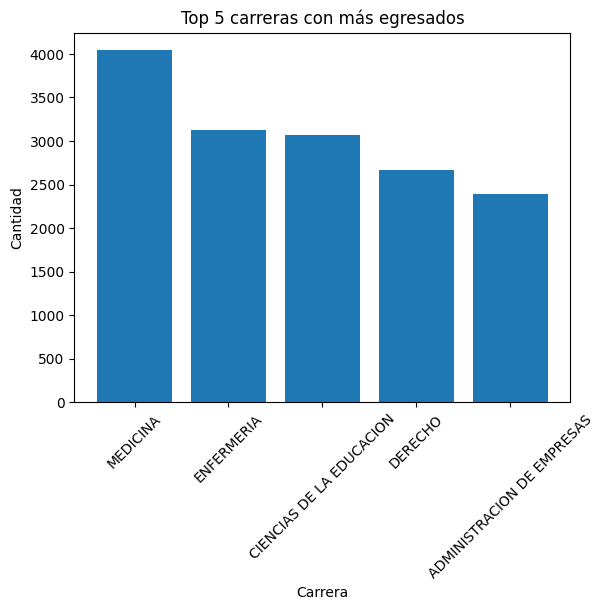

In [50]:
#Carreras con más egresados
top_carreras = df3['carrera'].value_counts().head(5)
x = top_carreras.index
y = top_carreras.values

plt.bar(x, y)

plt.xlabel('Carrera')
plt.ylabel('Cantidad')
plt.title('Top 5 carreras con más egresados')

plt.xticks(rotation=45)

plt.show()

In [81]:
conteo_carreras = df3['carrera'].value_counts()

carreras_menos_egresados = conteo_carreras.sort_values().head(5)

print("Carreras con menos egresados:")
print(carreras_menos_egresados)

Carreras con menos egresados:
CIENCIAS DE LA INVESTIGACION CIENTIFICA                                         1
POLITICAS SOCIALES Y DERECHOS HUMANOS DE LA NINEZ Y ADOLESCENCIA EN PARAGUAY    1
TECNOLOGIA DE LA PRODUCCION APLICADA A LOS ALIMENTOS                            1
EDUCACION PARVULARIA Y 1ER. CICLO EDUCACION ESCOLAR BASICA                      1
HIDROGEOLOGIA                                                                   1
Name: carrera, dtype: int64


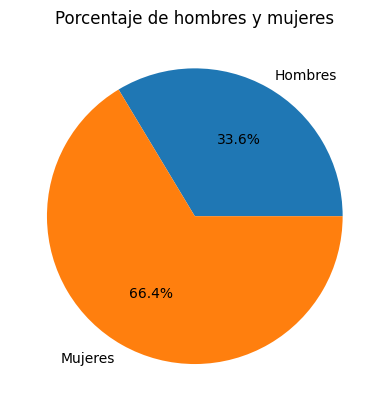

In [52]:
total_registros = len(df3)
porcentaje_hombres = (df3['sexo'] == 'HOMBRE').sum() / total_registros * 100
porcentaje_mujeres = (df3['sexo'] == 'MUJER').sum() / total_registros * 100

porcentajes = [porcentaje_hombres, porcentaje_mujeres]
etiquetas = ['Hombres', 'Mujeres']

plt.pie(porcentajes, labels=etiquetas, autopct='%1.1f%%')

plt.title('Porcentaje de hombres y Mujeres')

plt.show()

## Análisis descriptivo e inferencial

In [53]:
cantidad_carreras = len(df3['carrera'].unique())
print("Cantidad de carreras:", cantidad_carreras)

moda_carreras = df3['carrera'].mode()
print("Moda de las carreras:", moda_carreras)

Cantidad de carreras: 650
Moda de las carreras: 0    MEDICINA
Name: carrera, dtype: object


Hay 652 carreras, de las cuales Medicina es la que cuenta con más egresados

In [54]:
cantidad_instituciones = len(df3['institucion'].unique())
print("Cantidad de instituciones:", cantidad_instituciones)

moda_instituciones = df3['institucion'].mode()
print("Moda de las instituciones:", moda_instituciones)

Cantidad de instituciones: 191
Moda de las instituciones: 0    UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUN...
Name: institucion, dtype: object


De las 202 instituciones, Universidad Catolica de Asuncion es la que cuenta con más egresados. (La base no cuenta con la Universidad Nacional)

In [55]:
cantidad_distritos = len(df3['distrito'].unique())
print("Cantidad de distritos:", cantidad_distritos)

moda_distritos = df3['distrito'].mode()
print("Moda de los distritos:", moda_distritos)

Cantidad de distritos: 83
Moda de los distritos: 0    ASUNCION
Name: distrito, dtype: object


De los 85 distritos, Asunción es el distrito que cuenta con más egresados

In [56]:
cantidad_medicina = df3[(df3['carrera'] == 'MEDICINA') & (df3['nombre_institucion'] == 'UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUNCION')].shape[0]

print("Cantidad de personas que egresaron en medicina en la Universidad Católica de Nuestra Señora de la Asunción:")
print(cantidad_medicina)

Cantidad de personas que egresaron en medicina en la Universidad Católica de Nuestra Señora de la Asunción:
480


In [57]:
top_10_carreras = df3[df3['institucion'] == 'UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUNCION']['carrera'].value_counts().head(10)

print("Las 10 carreras con más egresados en la Universidad Católica de Nuestra Señora de la Asunción:")
print(top_10_carreras)

Las 10 carreras con más egresados en la Universidad Católica de Nuestra Señora de la Asunción:
MEDICINA                               480
ADMINISTRACION DE EMPRESAS             401
CONTADOR PUBLICO NACIONAL              247
DERECHO                                242
INGENIERIA AGRONOMICA                  163
ENFERMERIA                             133
ARQUITECTURA                           125
PROFESORADO EN EDUCACION PARVULARIA    124
DOCENCIA EN EDUCACION SUPERIOR         121
COMERCIO INTERNACIONAL                 110
Name: carrera, dtype: int64


In [58]:
egresados_ucnsa_asuncion = df3[(df3['institucion'] == 'UNIVERSIDAD CATOLICA NUESTRA SENORA DE LA ASUNCION') & (df3['distrito'] == 'ASUNCION')]

total_egresados = len(egresados_ucnsa_asuncion)
total_hombres = len(egresados_ucnsa_asuncion[egresados_ucnsa_asuncion['sexo'] == 'HOMBRE'])
total_mujeres = len(egresados_ucnsa_asuncion[egresados_ucnsa_asuncion['sexo'] == 'MUJER'])

print("Cantidad total de egresados en la Universidad Católica Nuestra Señora de la Asunción:", total_egresados)
print("Cantidad de hombres egresados:", total_hombres)
print("Cantidad de mujeres egresadas:", total_mujeres)

Cantidad total de egresados en la Universidad Católica Nuestra Señora de la Asunción: 694
Cantidad de hombres egresados: 302
Cantidad de mujeres egresadas: 392


In [59]:
grupo = df3.groupby(['carrera', 'sexo']).size().reset_index(name='count')

idx = grupo.groupby(['carrera'])['count'].transform(max) == grupo['count']
sexo_concurrido = grupo[idx]

sexo_concurrido = sexo_concurrido.sort_values(by='count', ascending=False)

sexo_concurrido_mujeres = sexo_concurrido[sexo_concurrido['sexo'] == 'MUJER']
print(sexo_concurrido_mujeres)


                                               carrera   sexo  count
809                                           MEDICINA  MUJER   2508
479                                         ENFERMERIA  MUJER   2459
189                           CIENCIAS DE LA EDUCACION  MUJER   2298
292                                            DERECHO  MUJER   1493
352                            DIDACTICA UNIVERSITARIA  MUJER   1386
..                                                 ...    ...    ...
457  ELABORACION Y EVALUACION DE PROYECTOS DE INVER...  MUJER      1
877                  NUTRICION CLINICA Y SALUD PUBLICA  MUJER      1
450  EDUCACION PARVULARIA Y 1ER. CICLO EDUCACION ES...  MUJER      1
422                 EDUCACION E INTELIGENCIA EMOCIONAL  MUJER      1
909                               PASTORAL CATEQUETICA  MUJER      1

[477 rows x 3 columns]


In [60]:
carreras_interes = ['MEDICINA', 'ENFERMERIA', 'CIENCIAS DE LA EDUCACION']
filtro = df3['carrera'].isin(carreras_interes)
conteo_hombres_por_carrera = df3[filtro].loc[df3['sexo'] == 'HOMBRE', 'carrera'].value_counts()

print("Cantidad de hombres por carrera:")
print(conteo_hombres_por_carrera)

Cantidad de hombres por carrera:
MEDICINA                    1534
CIENCIAS DE LA EDUCACION     769
ENFERMERIA                   663
Name: carrera, dtype: int64


Podemos ver que en la carrera de enfermeria y ciencias de la educación hay una diferencia muy grande entre hombres y mujeres, pero en cuanto a Medicina no hay una diferencia tan grande con 1534 hombres y 2508 mujeres.

In [61]:
grupo = df3.groupby(['carrera', 'sexo']).size().reset_index(name='count')

idx = grupo.groupby(['carrera'])['count'].transform(max) == grupo['count']
sexo_concurrido = grupo[idx]

sexo_concurrido = sexo_concurrido.sort_values(by='count', ascending=False)

sexo_concurrido_hombres = sexo_concurrido[sexo_concurrido['sexo'] == 'HOMBRE']
print(sexo_concurrido_hombres)

                                  carrera    sexo  count
668                 INGENIERIA AGRONOMICA  HOMBRE    484
219                   CIENCIAS POLICIALES  HOMBRE    391
211                    CIENCIAS MILITARES  HOMBRE    310
79                              AGRONOMIA  HOMBRE    261
620      GESTION Y ASESORAMIENTO POLICIAL  HOMBRE    172
..                                    ...     ...    ...
906    ORTOPEDIA Y TRAUMATOLOGIA INFANTIL  HOMBRE      1
907                  OTORRINOLARINGOLOGIA  HOMBRE      1
908                  PASTORAL CATEQUETICA  HOMBRE      1
697  INGENIERIA EN COMERCIO INTERNACIONAL  HOMBRE      1
631              HABILITACION PEDAGOGICA   HOMBRE      1

[208 rows x 3 columns]


In [62]:
carreras_interes = ['INGENIERIA AGRONOMICA', 'CIENCIAS POLICIALES', 'CIENCIAS MILITARES']
filtro = df3['carrera'].isin(carreras_interes)
conteo_mujeres_por_carrera = df3[filtro].loc[df3['sexo'] == 'MUJER', 'carrera'].value_counts()

print("Cantidad de mujeres por carrera:")
print(conteo_mujeres_por_carrera)

Cantidad de mujeres por carrera:
INGENIERIA AGRONOMICA    270
CIENCIAS POLICIALES       84
CIENCIAS MILITARES        57
Name: carrera, dtype: int64


Podemos ver que en la carrera de ciencias policiales y ciencias militares hay una diferencia muy grande entre hombres y mujeres, pero en cuanto a ingenieria agronomica no hay una diferencia tan grande, ya que sigue siendo más de la mitad que los hombres.

In [63]:
conteo_sexos = df3['sexo'].value_counts()
conteo_sexos_df = conteo_sexos.to_frame().reset_index()
conteo_sexos_df.columns = ['sexo', 'cantidad']
desviacion_estandar = conteo_sexos_df['cantidad'].std()
print("La desviacion estandar es:", round(desviacion_estandar))

La desviacion estandar es: 13065


La desviación estándar de 13065 demuestra que hay una variabilidad significativa en la distribución de los registros entre hombres y mujeres.

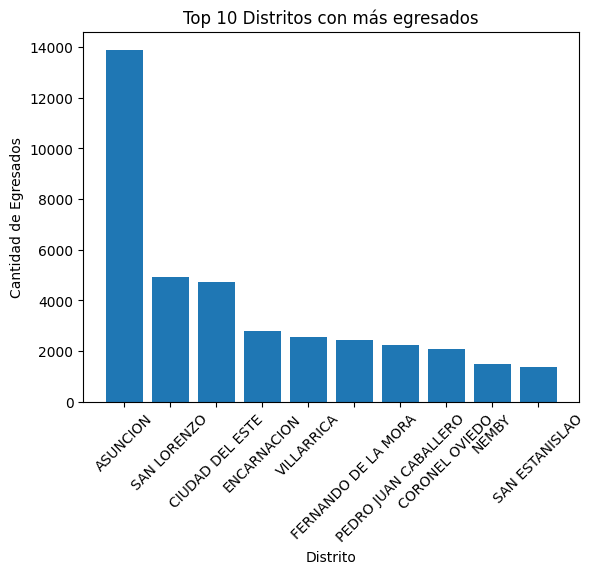

In [64]:
# Obtener los datos a graficar
distritos = df3['distrito'].value_counts().head(10)
x = distritos.index
y = distritos.values

# Crear el gráfico de barras
plt.bar(x, y)

# Personalizar el gráfico
plt.xlabel('Distrito')
plt.ylabel('Cantidad de Egresados')
plt.title('Top 10 Distritos con más egresados')

# Rotar los nombres de los distritos en el eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

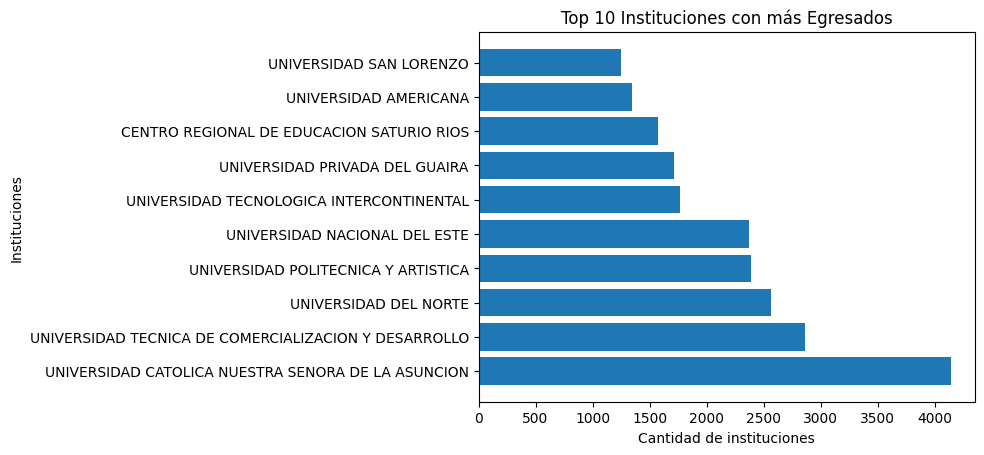

In [65]:
# Obtener los datos a graficar
distritos = df3['institucion'].value_counts().head(10)
x = distritos.index
y = distritos.values

# Crear el gráfico de barras
plt.barh(x, y)

# Personalizar el gráfico
plt.xlabel('Cantidad de instituciones')
plt.ylabel('Instituciones')
plt.title('Top 10 Instituciones con más Egresados')

# Mostrar el gráfico
plt.show()

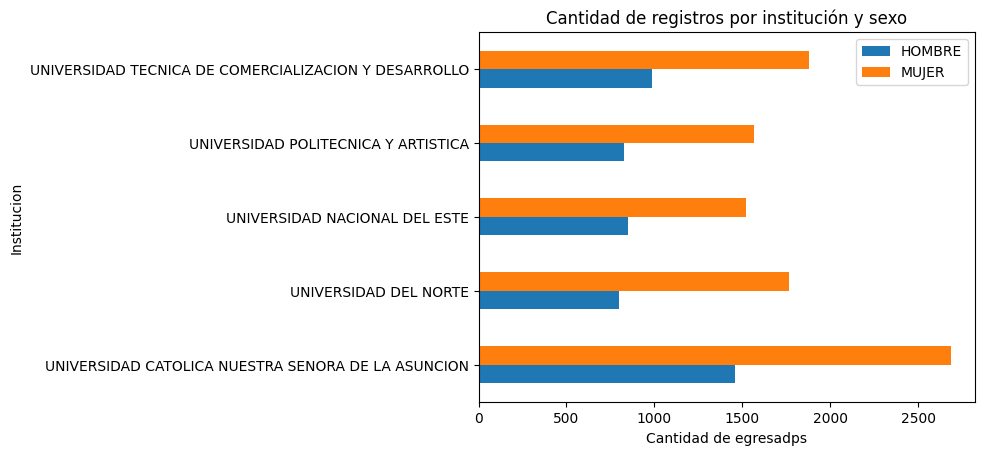

In [73]:
top_instituciones = df3['institucion'].value_counts().head(5)
df_top_instituciones = df3[df3['institucion'].isin(top_instituciones.index)]
registros_por_institucion_sexo = df_top_instituciones.groupby(['institucion', 'sexo']).size().unstack()
registros_por_institucion_sexo.plot(kind='barh', stacked=False)
plt.xlabel('Cantidad de egresadps')
plt.ylabel('Institucion')
plt.title('Cantidad de registros por institución y sexo')
plt.legend(loc='upper right')
plt.show()

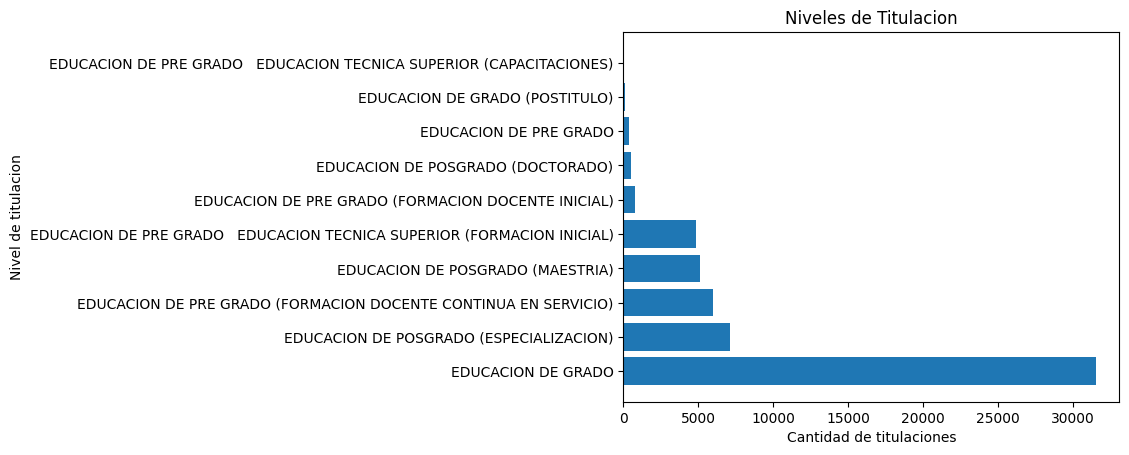

In [74]:
# Obtener los datos a graficar
distritos = df3['nivel_titulacion'].value_counts().head(10)
x = distritos.index
y = distritos.values

# Crear el gráfico de barras
plt.barh(x, y)

# Personalizar el gráfico
plt.xlabel('Cantidad de titulaciones')
plt.ylabel('Nivel de titulacion')
plt.title('Niveles de Titulacion')

# Mostrar el gráfico
plt.show()

In [68]:
conteo_por_titulacion_sexo = df3.groupby(['nivel_titulacion', 'sexo']).size().sort_values(ascending=False)
print("Cantidad de personas por nivel de titulación y sexo:")
print(conteo_por_titulacion_sexo)


Cantidad de personas por nivel de titulación y sexo:
nivel_titulacion                                                         sexo  
EDUCACION DE GRADO                                                       MUJER     20555
                                                                         HOMBRE    10991
EDUCACION DE POSGRADO (ESPECIALIZACION)                                  MUJER      4845
EDUCACION DE PRE GRADO (FORMACION DOCENTE CONTINUA EN SERVICIO)          MUJER      4592
EDUCACION DE PRE GRADO   EDUCACION TECNICA SUPERIOR (FORMACION INICIAL)  MUJER      3319
EDUCACION DE POSGRADO (MAESTRIA)                                         MUJER      2827
                                                                         HOMBRE     2292
EDUCACION DE POSGRADO (ESPECIALIZACION)                                  HOMBRE     2262
EDUCACION DE PRE GRADO   EDUCACION TECNICA SUPERIOR (FORMACION INICIAL)  HOMBRE     1550
EDUCACION DE PRE GRADO (FORMACION DOCENTE CONTINUA EN SERVICIO)   

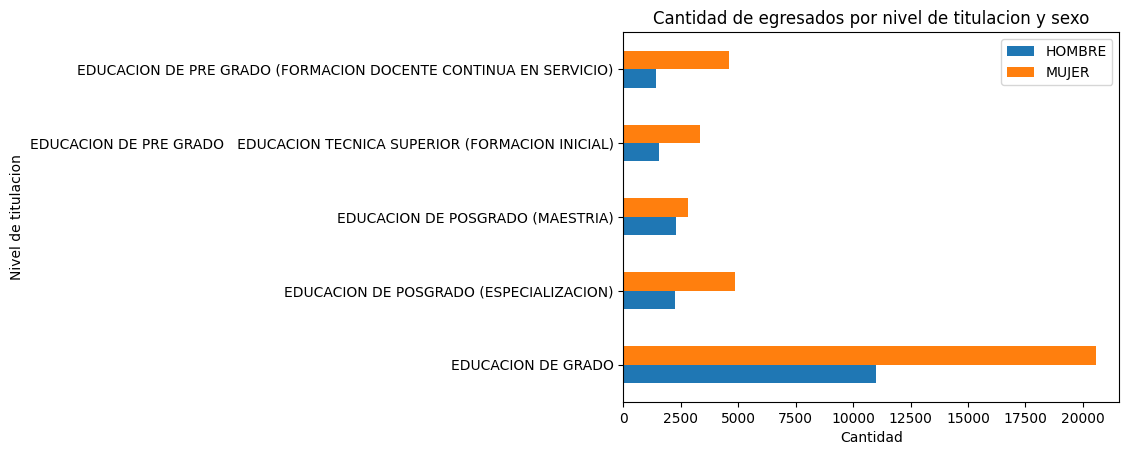

In [82]:
top_instituciones = df3['nivel_titulacion'].value_counts().head(5)
df_top_instituciones = df3[df3['nivel_titulacion'].isin(top_instituciones.index)]
registros_por_institucion_sexo = df_top_instituciones.groupby(['nivel_titulacion', 'sexo']).size().unstack()
registros_por_institucion_sexo.plot(kind='barh', stacked=False)
plt.xlabel('Cantidad')
plt.ylabel('Nivel de titulacion')
plt.title('Cantidad de egresados por nivel de titulacion y sexo')
plt.legend(loc='upper right')
plt.show()

## Conclusión

La base de datos trata de todos los egresados, en 2022 y comienzos de 2023, y las instituciones educativas de Paraguay. La base final cuenta con 58 mil registros de egresados relacionados con una institución educativa que puede ser universidad o instituto, distrito y con un nivel de titulación de grado, pos grado, maestría, pre grado, doctorado, etc. Al comenzar el análisis los datos totales muestran que un 66% de las mujeres egresaron mientras solo un 33% de hombres lo cual es importante para los siguientes análisis realizados. De las 652 carreras Medicina es la que cuenta con más egresados y de las 202 universidades la Universidad Catolica Nuestra Señora de la Asunción es la que más egresados tiene. Y el distrito con más egresados es Asunción cosa que no llama la atención al ser la ciudad con mayor infraestructura y la capital del país. Lo curioso es que la carrera con más egresados solo tiene 480 egresados de la Universidad con más egresados en la base.
Las carreras de las cuales más egresaron mujeres son Medicina, Enfermería y ciencias de la educación, en cambio los hombres egresaron en Ingeniería Agronómica, Ciencias Policiales y Ciencias Militares. Al analizar estas mismas carreras pero para el otro sexo podemos ver que la diferencia es bastante grande con casi más de la mitad para todos los casos.
Las carreras con menos egresados, tan bajo como 1 solo egresado, son hidrogeológica, políticas sociales y derechos humanos de la niñez, ciencias de la investigación científica.
Otro punto analizado son los niveles de titulación, el doble de mujeres que hombres egresaron con una titulación de posgrado(especialización) así como también con una maestría.